In [2]:
import os
import numpy as np
import pandas as pd
from paws.components import ModelTrainer, ModelLoader, MetricLandscape, DataLoader

datadir = "/pscratch/sd/c/chlcheng/projects/paws/datasets"
outdir = "/pscratch/sd/c/chlcheng/projects/paws/outputs"

model_trainer = ModelTrainer("param_supervised", decay_modes="qq",
                             variables="3,5,6", datadir=datadir, outdir=outdir)
model_path = os.path.join(model_trainer.get_checkpoint_dir(), 'full_train.keras')
model = ModelLoader.load_model(model_path)

2024-09-28 04:32:28.931460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 04:32:28.932474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 04:32:29.034601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 04:32:29.267121: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 04:32:31.715800: W tensorflow/compiler/tf2

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


2024-09-28 04:32:34.616869: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[INFO] Created MirroredStrategy for distributed training
[INFO] Number of devices : 1
[INFO]      aliad version : 0.1.0
[INFO] tensorflow version : 2.15.0
Sat Sep 28 04:32:34 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:C3:00.0 Off |                    0 |
| N/A   33C    P0    33W / 250W |      2MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+------------

In [3]:
data_loader = DataLoader(decay_modes="qq", variables="3,5,6", datadir=datadir)
datasets = data_loader.get_datasets(mass_point=(300, 300),
                                    custom_masses=(300, 300),
                                    cache_dataset=True,
                                    cache_test = True)

[INFO] Number of events in each dataset split:
            train     val    test
QCD         60700   30327   30325
extra_QCD  306450  153208  153200
W_qq        37250   18622   18600
total      404400  202157  202125
num_batch     395     198     198


In [14]:
x = np.concatenate([d[0][0] for d in datasets['train']])
y_true = np.concatenate([d[1] for d in datasets['train']]).flatten()
y_pred = np.concatenate(model.predict(datasets['train'])).flatten()

395/395 [==============================] - 1s 2ms/step


In [15]:
likelihood = y_pred / (1 - y_pred)
sig_mask = y_true == 1
bkg_mask = y_true == 0
m1 = x[:, 0, 0] * 1000
m2 = x[:, 1, 0] * 1000
m1_bkg = m1[bkg_mask]
m2_bkg = m2[bkg_mask]
tau12_1 = x[:, 0, 1]
tau12_2 = x[:, 1, 1]
x_sig, x_bkg = x[sig_mask], x[bkg_mask]
y_sig, y_bkg = y_pred[sig_mask], y_pred[bkg_mask]
l_sig, l_bkg = likelihood[sig_mask], likelihood[bkg_mask]

In [38]:
cut = 1#np.quantile(l_bkg, 0.99)
l_bkg[l_bkg < cut].shape[0] / l_bkg[l_bkg < cut].sum()

78.85524916214545

In [39]:
l_bkg[l_bkg < cut].sum()

4615.292

In [21]:
l_bkg.max()

2191.8135

In [22]:
import matplotlib.pyplot as plt

(array([3.44068e+05, 7.81600e+03, 3.31600e+03, 1.85400e+03, 1.29700e+03,
        9.30000e+02, 6.68000e+02, 5.90000e+02, 4.45000e+02, 3.64000e+02,
        3.54000e+02, 2.98000e+02, 2.59000e+02, 2.09000e+02, 1.72000e+02,
        1.66000e+02, 1.71000e+02, 1.46000e+02, 1.43000e+02, 1.32000e+02,
        1.27000e+02, 1.35000e+02, 1.01000e+02, 8.70000e+01, 9.20000e+01,
        7.40000e+01, 8.40000e+01, 7.00000e+01, 5.30000e+01, 5.10000e+01,
        7.10000e+01, 6.30000e+01, 4.00000e+01, 4.90000e+01, 5.70000e+01,
        3.80000e+01, 5.40000e+01, 4.80000e+01, 4.00000e+01, 4.70000e+01,
        4.00000e+01, 4.10000e+01, 4.10000e+01, 2.80000e+01, 4.70000e+01,
        2.70000e+01, 3.30000e+01, 3.00000e+01, 2.20000e+01, 1.70000e+01]),
 array([0.        , 0.04      , 0.08      , 0.12      , 0.16      ,
        0.2       , 0.23999999, 0.28      , 0.31999999, 0.36000001,
        0.40000001, 0.44      , 0.47999999, 0.51999998, 0.56      ,
        0.60000002, 0.63999999, 0.68000001, 0.72000003, 0.759999

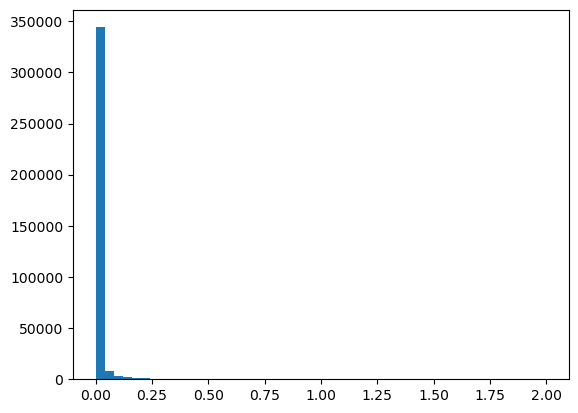

In [28]:
plt.hist(l_bkg, range=(0, 2), bins=50)

In [9]:
def create_weakly_data(mu = 0.1, nb=50000):
    ns = round(mu / (1 - mu) * nb)
    assert x_sig.size >= ns
    assert x_bkg.size >= 2 * nb
    x_data = np.concatenate([x_sig[:ns], x_bkg[:nb]])
    x_ref = x_bkg[nb: nb + nb]
    y_data = np.concatenate([y_sig[:ns], y_bkg[:nb]])
    y_ref = y_bkg[nb: nb + nb]
    l_data = np.concatenate([l_sig[:ns], l_bkg[:nb]])
    l_ref = l_bkg[nb: nb + nb]
    lr_data = mu * l_data + (1 - mu)
    lr_ref = mu* l_ref + (1 - mu)
    return x_data, x_ref, y_data, y_ref, lr_data, lr_ref
mu = 0.1
nb = 50000
x_data, x_ref, y_data, y_ref, lr_data, lr_ref = create_weakly_data(mu=mu)

In [32]:
w_sig = np.ones(x_sig.shape[0]) / len(x_sig)
w_bkg = np.ones(x_bkg.shape[0]) / len(x_bkg)
x_data_f = np.concatenate([x_sig, x_bkg])
y_data_f = np.concatenate([y_sig, y_bkg])
w_data = np.concatenate([ mu * w_sig, (1 - mu)* w_bkg])

In [22]:
import pandas as pd
from quickstats.plots import VariableDistributionPlot

df_sig = pd.DataFrame({
    'm1': m1[sig_mask],
    'm2': m2[sig_mask],
    'y_pred': y_pred[sig_mask],
    'tau12_j1': tau12_1[sig_mask],
    'weight': np.ones(m1[sig_mask].shape)
})
df_bkg = pd.DataFrame({
    'm1': m1[bkg_mask],
    'm2': m2[bkg_mask],
    'y_pred': y_pred[bkg_mask],
    'tau12_j1': tau12_1[bkg_mask],
    'weight': np.ones(m1[bkg_mask].shape)
})
df_rw = pd.DataFrame({
    'm1': m1[bkg_mask],
    'm2': m2[bkg_mask],
    'y_pred': y_pred[bkg_mask],
    'tau12_j1': tau12_1[bkg_mask],
    'weight':  (likelihood[bkg_mask] / likelihood[bkg_mask].sum()) * m1[bkg_mask].shape[0]
})
df_sig_rw = pd.DataFrame({
    'm1': m1[sig_mask],
    'm2': m2[sig_mask],
    'y_pred': y_pred[sig_mask],
    'tau12_j1': tau12_1[sig_mask],
    'weight': likelihood[sig_mask]
})
df_data = pd.DataFrame({
    'm1': x_data[:, 0, 0] * 1000,
    'm2': x_data[:, 0, 1] * 1000,
    'y_pred': y_data,
    'tau12_j1': x_data[:, 0, 1],
    'weight': np.ones(y_data.shape)
})
df_data_2 = pd.DataFrame({
    'm1': x_data_f[:, 0, 0] * 1000,
    'm2': x_data_f[:, 0, 1] * 1000,
    'y_pred': y_data_f,
    #'tau12_j1': x_data[:, 0, 1],
    'weight': w_data
})
df_ref = pd.DataFrame({
    'm1': x_ref[:, 0, 0] * 1000,
    'm2': x_ref[:, 0, 1] * 1000,
    'y_pred': y_ref,
    'tau12_j1': x_ref[:, 0, 1],
    'weight': np.ones(y_ref.shape)
})

df_ref_rw = pd.DataFrame({
    'm1': m1_bkg,
    'm2': m2_bkg,
    'y_pred': y_bkg,
    'tau12_j1': y_bkg,
    'weight': mu * (l_bkg / l_bkg.sum()) *m1_bkg.shape[0] + (1 - mu)
    #np.concatenate([mu * l_bkg[:nb], np.ones(nb) * (1 - mu)])
})
#df_ref_rw = pd.DataFrame({
#    'm1': m1_bkg[:2 * nb],
#    'm2': m2_bkg[:2 * nb],
#    'y_pred': y_bkg[:2 * nb],
#    'tau12_j1': y_bkg[:2 * nb],
#    'weight': mu*l_bkg[: 2 *nb] + np.ones(2 * nb)
#    #np.concatenate([mu * l_bkg[:nb], np.ones(nb) * (1 - mu)])
#})

#df_ref_rw = pd.DataFrame({
#    'm1': np.concatenate([m1_bkg[: nb], m1_bkg[: nb]]),
#    #'m2': m2_bkg[:2 * nb],
#    #'y_pred': y_bkg[:2 * nb],
#    #'tau12_j1': y_bkg[:2 * nb],
#    'weight': np.concatenate([np.ones(nb), np.ones(nb)])
#    #np.concatenate([mu * l_bkg[:nb], np.ones(nb) * (1 - mu)])
#})
dfs = {
    'Signal': df_sig,
    'Background': df_bkg,
    'Background Reweighted': df_rw,
    'Signal Reweighted': df_sig_rw,
    'Data': df_data,
    'Data2': df_data_2,
    'Reference': df_ref,
    'Reference Reweighted': df_ref_rw
}
analysis_label_options = {
    'extra_text': r'$(m_X, m_Y) = (300, 300) GeV$//'
}
plotter = VariableDistributionPlot(dfs, analysis_label_options=analysis_label_options)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 25.00'>

<Figure size 640x480 with 0 Axes>

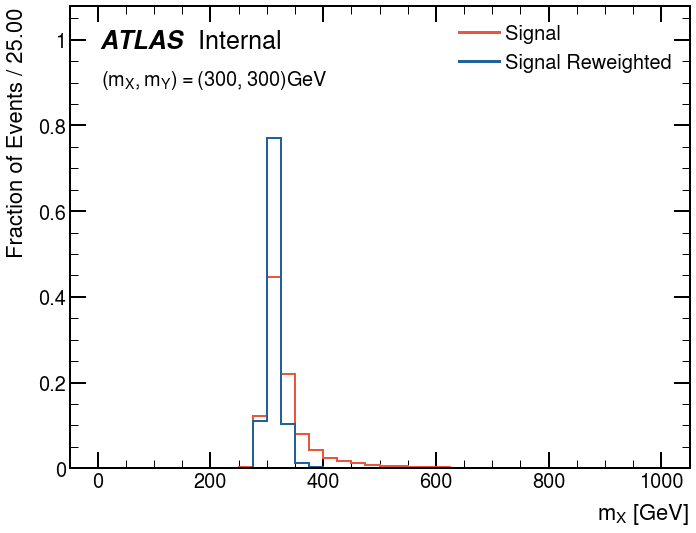

In [23]:
plotter.draw('m1', weight_name='weight', xlabel='$m_X$ [GeV]',
             #targets=['Data', 'Reference', 'Reference Reweighted'],
             targets=['Signal', 'Signal Reweighted'],
             #targets=['Reference', 'Reference Reweighted'],
             bin_range=(0, 1000), bins = 40, ypad=0.25, normalize=True)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 25.00'>

<Figure size 640x480 with 0 Axes>

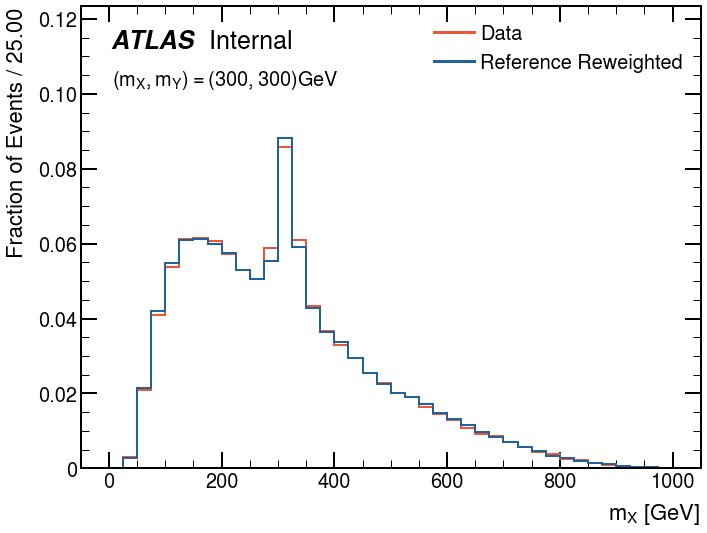

In [11]:
plotter.draw('m1', weight_name='weight', xlabel='$m_X$ [GeV]',
             #targets=['Data', 'Reference', 'Reference Reweighted'],
             targets=['Data', 'Reference Reweighted'],
             #targets=['Reference', 'Reference Reweighted'],
             bin_range=(0, 1000), bins = 40, ypad=0.25, normalize=True)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 12.50'>

<Figure size 640x480 with 0 Axes>

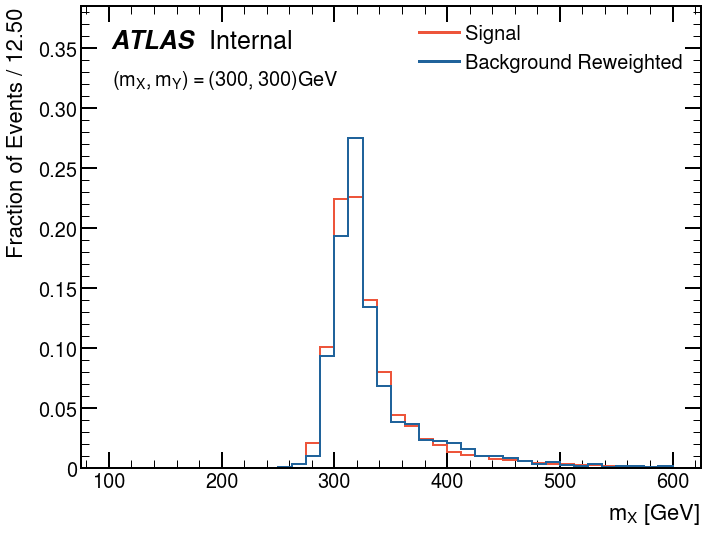

In [12]:
plotter.draw('m1', weight_name='weight', xlabel='$m_X$ [GeV]',
             #targets=['Signal', 'Background', 'Background Reweighted'],
             targets=['Signal', 'Background Reweighted'],
             bin_range=(100, 600), bins = 40, ypad=0.25, normalize=True)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 12.50'>

<Figure size 640x480 with 0 Axes>

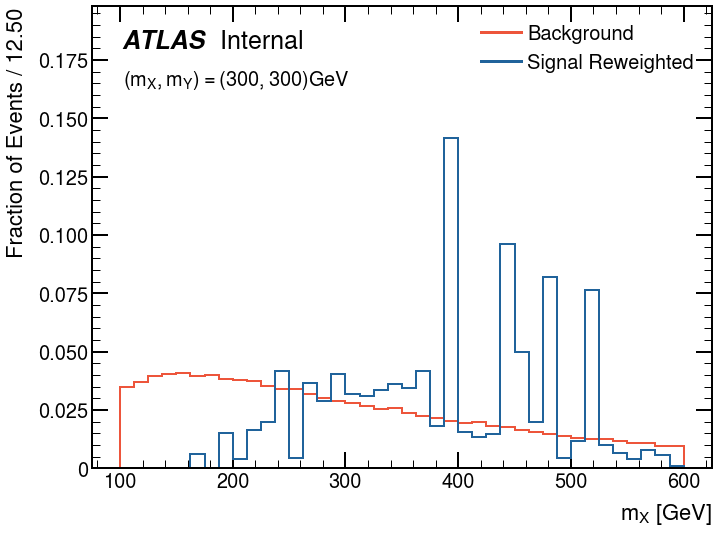

In [19]:
plotter.draw('m1', weight_name='weight', xlabel='$m_X$ [GeV]',
             #targets=['Signal', 'Background', 'Background Reweighted'],
             targets=['Background', 'Signal Reweighted'],
             bin_range=(100, 600), bins = 40, ypad=0.25, normalize=True)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 0.03'>

<Figure size 640x480 with 0 Axes>

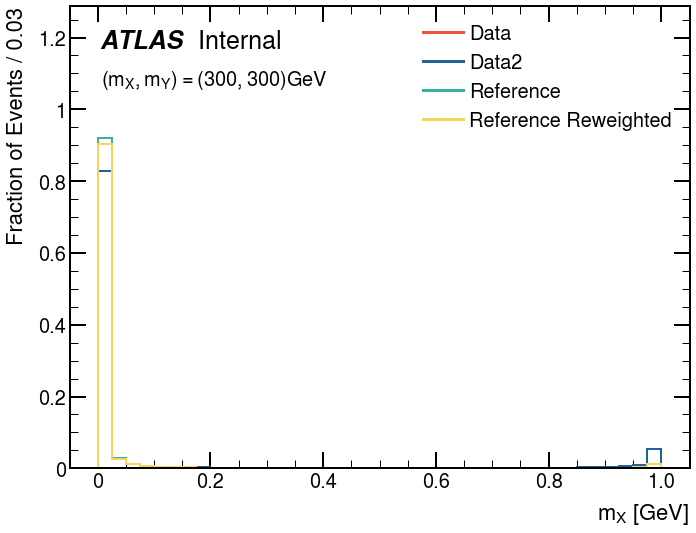

In [69]:
plotter.draw('y_pred', weight_name='weight', xlabel='$m_X$ [GeV]',
             targets=['Data', 'Data2', 'Reference', 'Reference Reweighted'],
             bin_range=(0, 1), bins = 40, ypad=0.25)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 12.50'>

<Figure size 640x480 with 0 Axes>

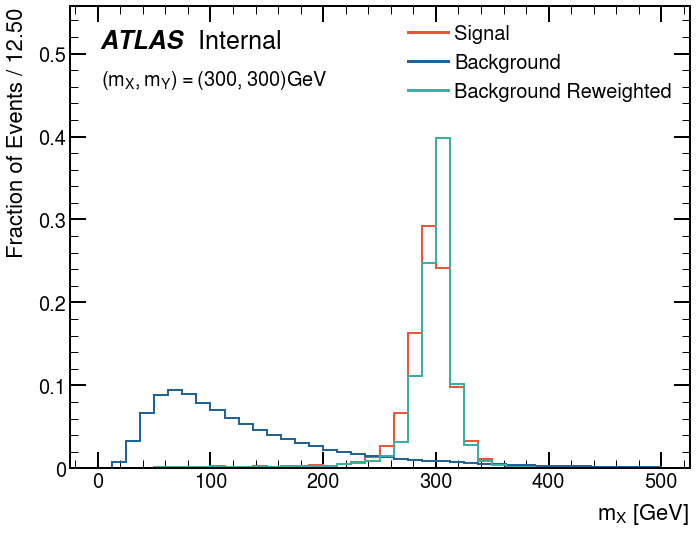

In [19]:
plotter.draw('m2', weight_name='weight', xlabel='$m_X$ [GeV]', bin_range=(0, 500), bins = 40, ypad=0.25)

<Axes: xlabel='$m_X$ [GeV]', ylabel='Fraction of Events / 0.03'>

<Figure size 640x480 with 0 Axes>

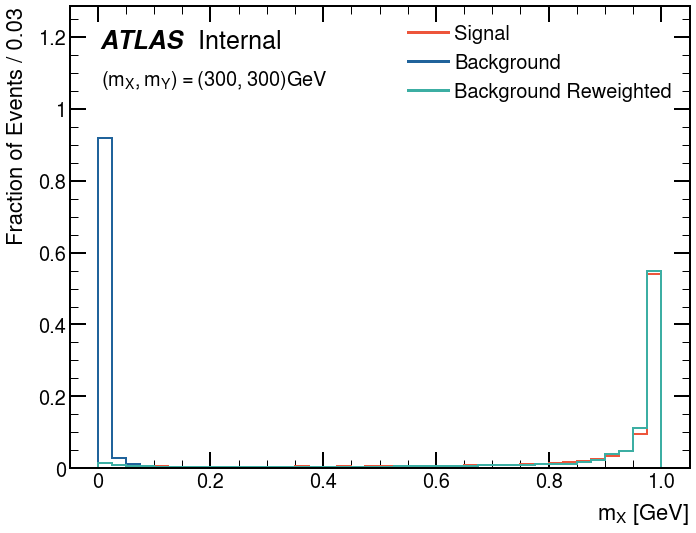

In [20]:
plotter.draw('y_pred', weight_name='weight', xlabel='$m_X$ [GeV]', bin_range=(0, 1), bins = 40, ypad=0.25)